In [4]:
import pandas as pd

house_prices = pd.read_csv("data/house_prices.csv")
print(house_prices.head())
print(house_prices.transpose())

flights = pd.read_csv("data/flights.csv")
# Assuming flights is a pandas DataFrame
flights['gain'] = flights['dep_delay'] - flights['arr_delay']

           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13  221900.0         3       1.00         1180   
1  6414100192  2014-12-09  538000.0         3       2.25         2570   
2  5631500400  2015-02-25  180000.0         2       1.00          770   
3  2487200875  2014-12-09  604000.0         4       3.00         1960   
4  1954400510  2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0       False     0  ...      7        1180              0   
1      7242     2.0       False     0  ...      7        2170            400   
2     10000     1.0       False     0  ...      6         770              0   
3      5000     1.0       False     0  ...      7        1050            910   
4      8080     1.0       False     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      19

In [5]:
##30

In [7]:
import pandas as pd

# Assuming flights is a pandas DataFrame and gain column already exists
gain_summary = flights['gain'].agg(['min', 'median', 'max', 'mean', 'std'])
gain_summary['q1'] = flights['gain'].quantile(0.25)
gain_summary['q3'] = flights['gain'].quantile(0.75)
gain_summary['missing'] = flights['gain'].isna().sum()

# Renaming 'std' to 'sd' for consistency with R's output
gain_summary.rename({'std': 'sd'}, inplace=True)
gain_summary

min        -196.000000
median        7.000000
max         109.000000
mean          5.659779
sd           18.043648
q1           -3.000000
q3           17.000000
missing    9430.000000
Name: gain, dtype: float64

In [12]:
import pandas as pd
from skimpy import skim

# Assuming house_prices is a pandas DataFrame
selected_columns = house_prices[['price', 'sqft_living', 'condition']]

# Using skimpy to get the summary
summary = skim(selected_columns)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 21613  │ │ int64       │ 2     │                                                          │
│ │ Number of columns │ 3      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name   ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p50     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ price         │   0 │     0 │  540000 │  370000 │  75000 │  320000 │  450000 │  640000 │  7700000 │   ▇    │  │
│ │ sqft_living   │   0 │     0 │    2100 │     920 │    290 │    1400 │    1900 │    2600 │    14000 │   ▇▃   │  │
│ │ condition     │   0 │     0 │     3.4 │    0.65 │      1 │       3 │       3 │       4 │        5 │    ▇▃▁ │  │
│ └───────────────┴─────┴───────┴─────────┴─────────┴────────┴─────────┴─────────┴─────────┴──────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

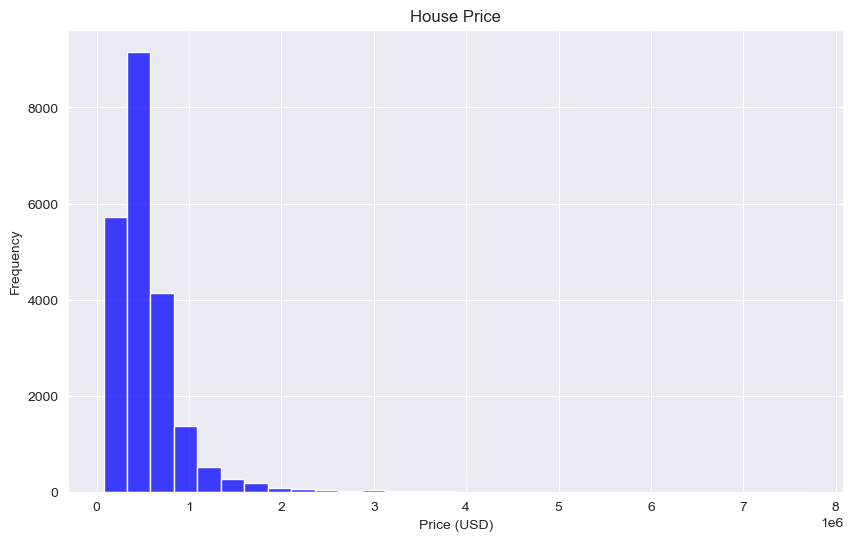

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming house_prices is a pandas DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(house_prices['price'], color='blue', edgecolor='white', bins=30)
plt.title('House Price')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

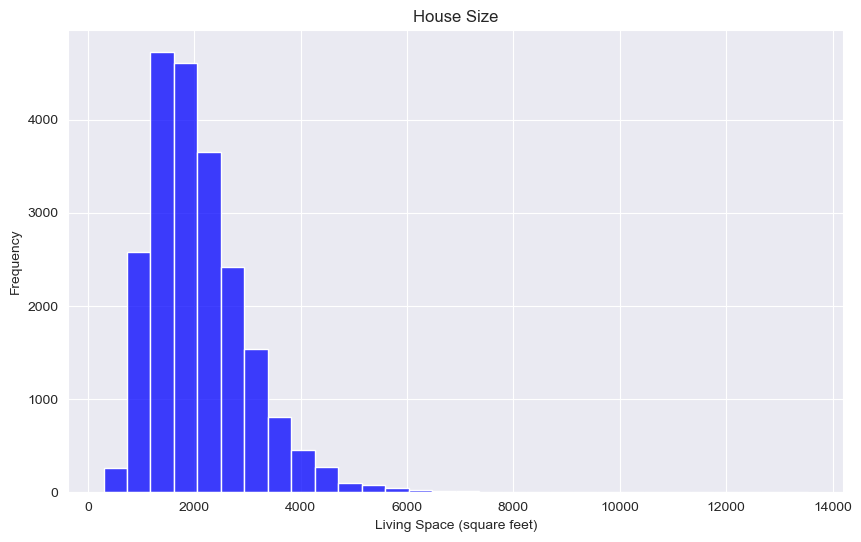

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming house_prices is a pandas DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(house_prices['sqft_living'], color='blue', edgecolor='white', bins=30)
plt.title('House Size')
plt.xlabel('Living Space (square feet)')
plt.ylabel('Frequency')
plt.show()

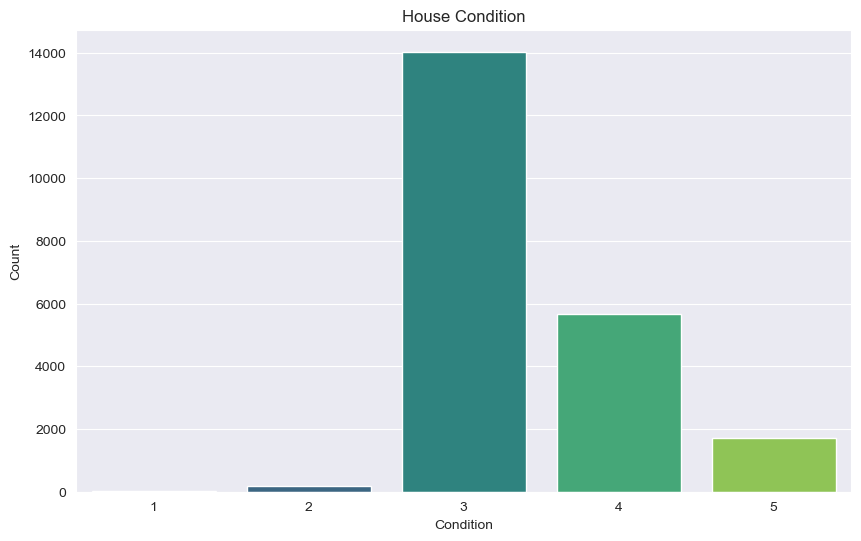

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming house_prices is a pandas DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='condition', data=house_prices, palette='viridis')
plt.title('House Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

In [18]:
import pandas as pd
import numpy as np

# Assuming house_prices is a pandas DataFrame
house_prices['log10_price'] = np.log10(house_prices['price'])
house_prices['log10_size'] = np.log10(house_prices['sqft_living'])

In [19]:
# Assuming house_prices is a pandas DataFrame
selected_columns = house_prices[['price', 'log10_price', 'sqft_living', 'log10_size']]

In [20]:
selected_columns

,price,log10_price,sqft_living,log10_size
0,221900.0,5.346157,1180,3.071882
1,538000.0,5.730782,2570,3.409933
2,180000.0,5.255273,770,2.886491
3,604000.0,5.781037,1960,3.292256
4,510000.0,5.707570,1680,3.225309
...,...,...,...,...
21608,360000.0,5.556303,1530,3.184691
21609,400000.0,5.602060,2310,3.363612
21610,402101.0,5.604335,1020,3.008600
21611,400000.0,5.602060,1600,3.204120


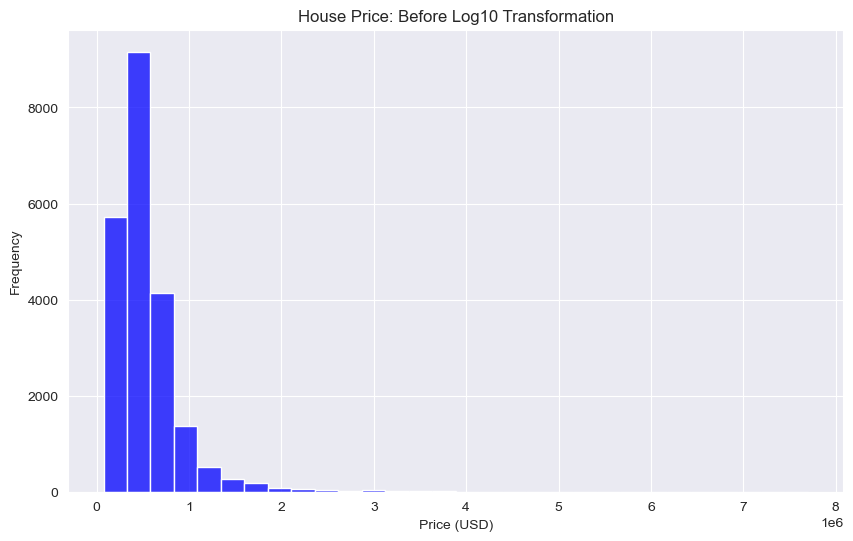

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming house_prices is a pandas DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(house_prices['price'], color='blue', edgecolor='white', bins=30)
plt.title('House Price: Before Log10 Transformation')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

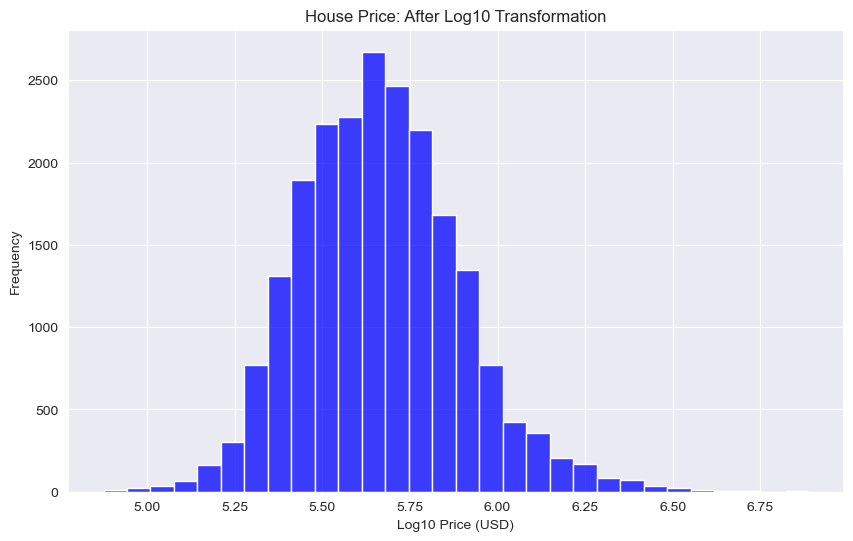

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming house_prices is a pandas DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(house_prices['log10_price'], color='blue', edgecolor='white', bins=30)
plt.title('House Price: After Log10 Transformation')
plt.xlabel('Log10 Price (USD)')
plt.ylabel('Frequency')
plt.show()

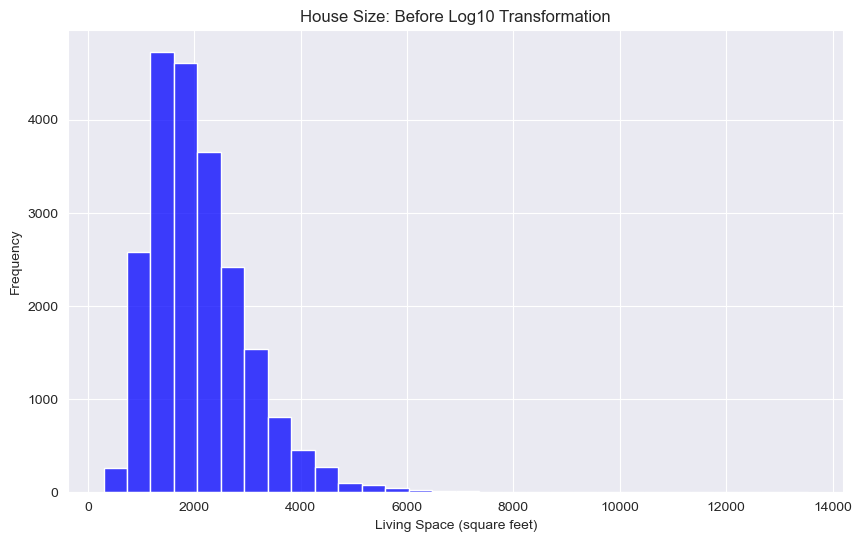

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming house_prices is a pandas DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(house_prices['sqft_living'], color='blue', edgecolor='white', bins=30)
plt.title('House Size: Before Log10 Transformation')
plt.xlabel('Living Space (square feet)')
plt.ylabel('Frequency')
plt.show()

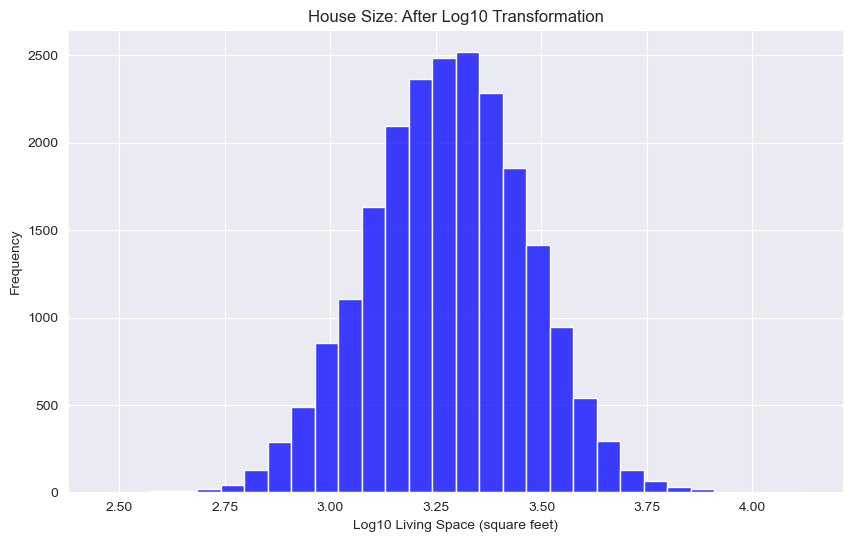

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming house_prices is a pandas DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(house_prices['log10_size'], color='blue', edgecolor='white', bins=30)
plt.title('House Size: After Log10 Transformation')
plt.xlabel('Log10 Living Space (square feet)')
plt.ylabel('Frequency')
plt.show()

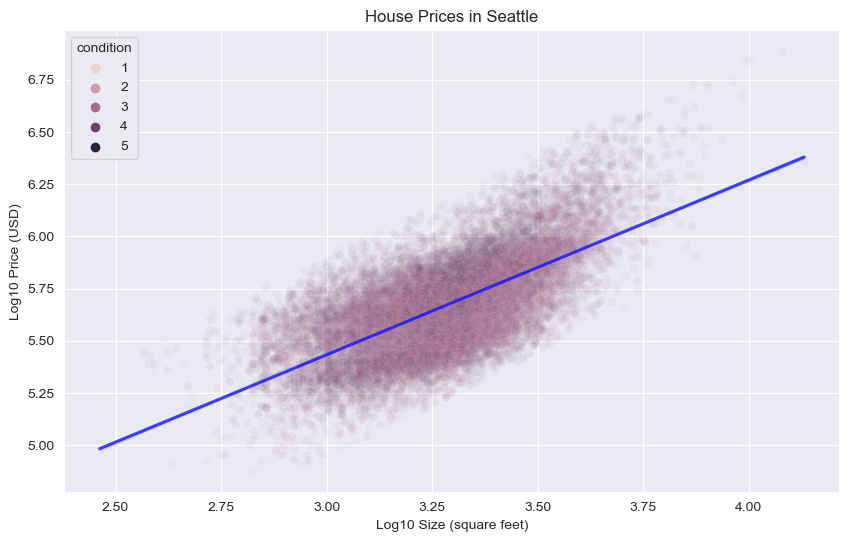

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming house_prices is a pandas DataFrame
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(data=house_prices, x='log10_size', y='log10_price', hue='condition', alpha=0.05)

# Linear model fit
sns.regplot(data=house_prices, x='log10_size', y='log10_price', scatter=False, color='blue', line_kws={'alpha':0.7})

plt.title('House Prices in Seattle')
plt.xlabel('Log10 Size (square feet)')
plt.ylabel('Log10 Price (USD)')
plt.show()

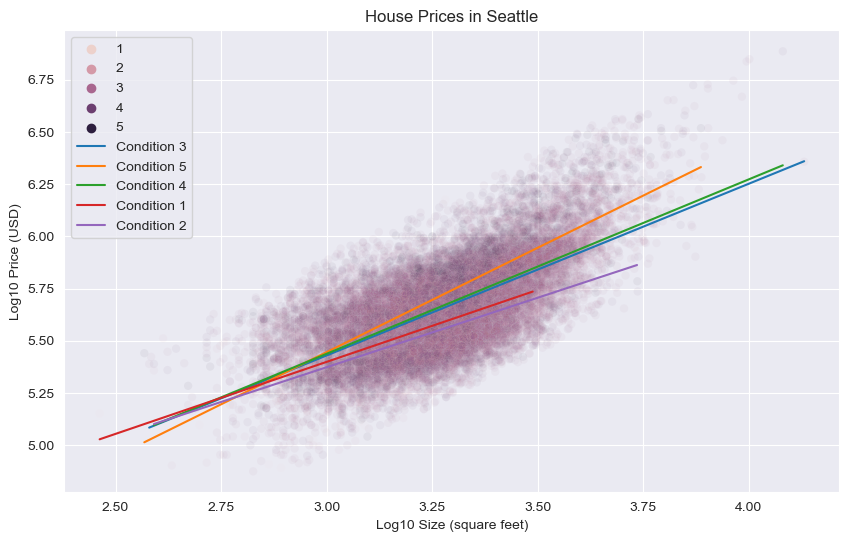

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Assuming house_prices is a pandas DataFrame
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(data=house_prices, x='log10_size', y='log10_price', hue='condition', alpha=0.05)

# Fitting linear models for each condition and plotting
for condition in house_prices['condition'].unique():
    subset = house_prices[house_prices['condition'] == condition]
    
    # Fit the model
    X = sm.add_constant(subset['log10_size'])
    y = subset['log10_price']
    model = sm.OLS(y, X).fit()
    
    # Create a sequence of values for predictions
    x_range = np.linspace(subset['log10_size'].min(), subset['log10_size'].max(), 100)
    y_range = model.predict(sm.add_constant(x_range))
    
    # Plotting the line
    plt.plot(x_range, y_range, label=f'Condition {condition}')

plt.title('House Prices in Seattle')
plt.xlabel('Log10 Size (square feet)')
plt.ylabel('Log10 Price (USD)')
plt.legend()
plt.show()

/Users/developerX/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


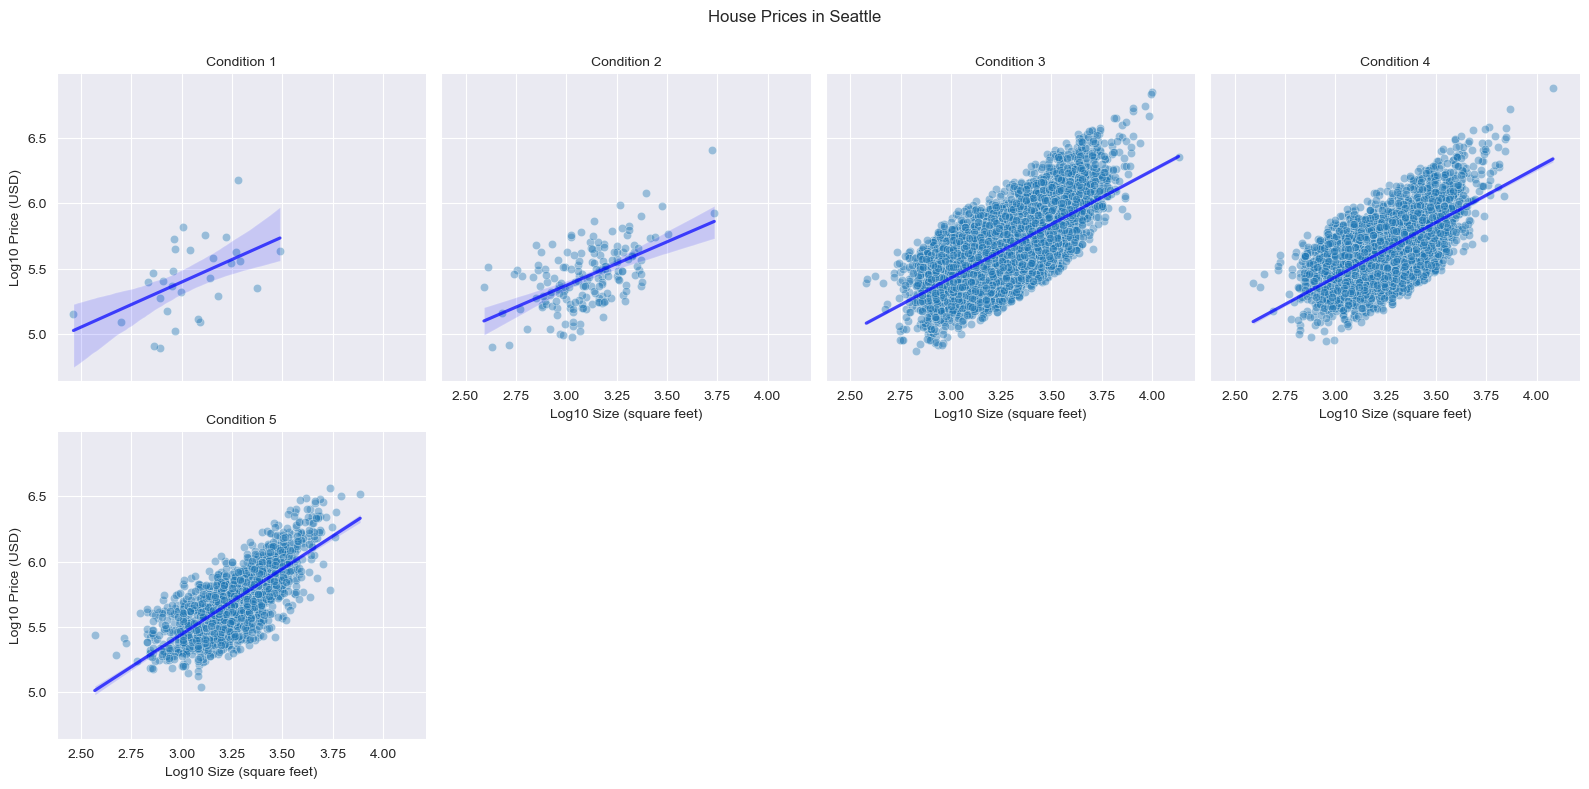

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming house_prices is a pandas DataFrame
g = sns.FacetGrid(house_prices, col='condition', col_wrap=4, height=4)
g.map_dataframe(sns.scatterplot, x='log10_size', y='log10_price', alpha=0.4)

# Adding a linear regression line to each facet
g.map_dataframe(sns.regplot, x='log10_size', y='log10_price', scatter=False, color='blue', line_kws={'alpha':0.7})

# Setting the titles and labels
g.set_titles(col_template="Condition {col_name}")
g.set_axis_labels("Log10 Size (square feet)", "Log10 Price (USD)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("House Prices in Seattle")
plt.show()

In [28]:
import statsmodels.formula.api as smf

# Assuming house_prices is a pandas DataFrame
model = smf.ols('log10_price ~ log10_size * condition', data=house_prices).fit()

# To view the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log10_price   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     6176.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:04:56   Log-Likelihood:                 7907.3
No. Observations:               21613   AIC:                        -1.581e+04
Df Residuals:                   21609   BIC:                        -1.577e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.4417 

In [29]:
import statsmodels.formula.api as smf

# Assuming house_prices is a pandas DataFrame and the model has already been created
model = smf.ols('log10_price ~ log10_size * condition', data=house_prices).fit()

# To get the regression table
regression_table = model.summary2().tables[1]
print(regression_table)

                         Coef.  Std.Err.          t          P>|t|    [0.025  \
Intercept             3.441721  0.105351  32.669198  1.524912e-228  3.235226   
log10_size            0.651156  0.032214  20.213523   5.061068e-90  0.588015   
condition            -0.158778  0.030704  -5.171335   2.344997e-07 -0.218960   
log10_size:condition  0.056473  0.009400   6.007928   1.909177e-09  0.038049   

                        0.975]  
Intercept             3.648217  
log10_size            0.714298  
condition            -0.098597  
log10_size:condition  0.074898  


In [31]:
import pandas as pd

# Load the CSV file into a DataFrame
US_births_1994_2003 = pd.read_csv('data/US_births_1994_2003.csv')

print(US_births_1994_2003.head())
print(US_births_1994_2003.transpose())

# Filter the DataFrame to include only the rows where year is 1999
US_births_1999 = US_births_1994_2003[US_births_1994_2003['year'] == 1999]


   year  month  date_of_month        date day_of_week  births
0  1994      1              1  1994-01-01         Sat    8096
1  1994      1              2  1994-01-02         Sun    7772
2  1994      1              3  1994-01-03         Mon   10142
3  1994      1              4  1994-01-04        Tues   11248
4  1994      1              5  1994-01-05         Wed   11053
                     0           1           2           3           4     \
year                 1994        1994        1994        1994        1994   
month                   1           1           1           1           1   
date_of_month           1           2           3           4           5   
date           1994-01-01  1994-01-02  1994-01-03  1994-01-04  1994-01-05   
day_of_week           Sat         Sun         Mon        Tues         Wed   
births               8096        7772       10142       11248       11053   

                     5           6           7           8           9     \
year       

/var/folders/fw/m5f2ykhd1yzc0yxvp3g1vy180000gp/T/ipykernel_18104/2296786053.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_births_1999['date'] = pd.to_datetime(US_births_1999['date'])


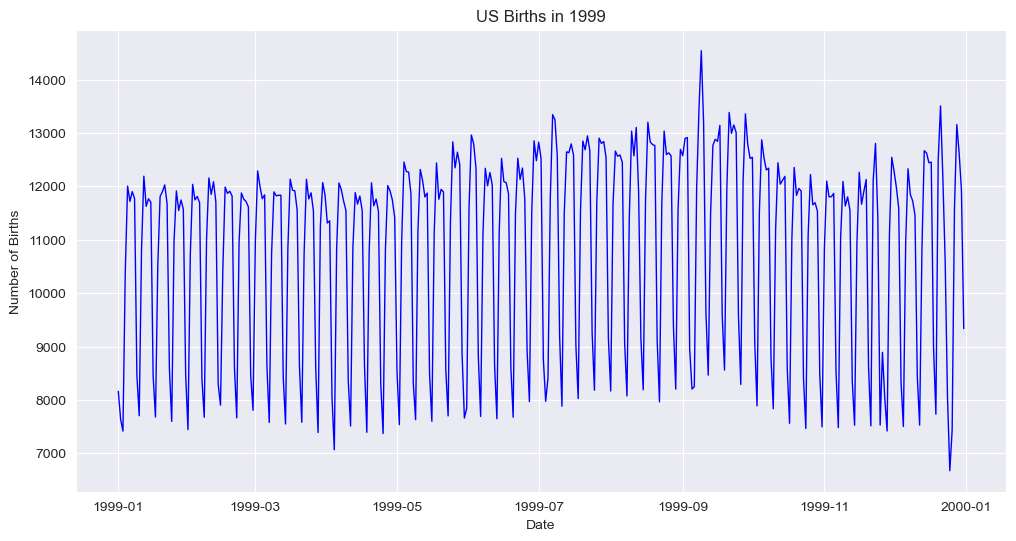

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming US_births_1999 is a pandas DataFrame and the date column is properly formatted
# If the 'date' column is not in datetime format, convert it
US_births_1999['date'] = pd.to_datetime(US_births_1999['date'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(US_births_1999['date'], US_births_1999['births'], color='blue', linewidth=1)
plt.title('US Births in 1999')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.grid(True)
plt.show()

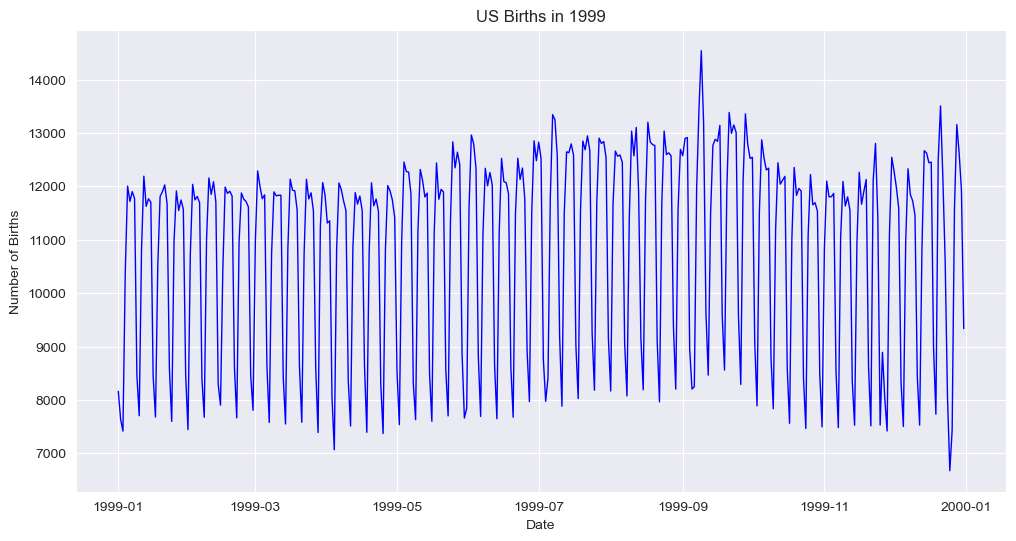

In [39]:
import pandas as pd

# Filter for the year 1999 and create a copy
US_births_1999 = US_births_1994_2003[US_births_1994_2003['year'] == 1999].copy()

# Convert the 'date' column to datetime format in the copy
US_births_1999['date'] = pd.to_datetime(US_births_1999['date'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(US_births_1999['date'], US_births_1999['births'], color='blue', linewidth=1)
plt.title('US Births in 1999')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.grid(True)
plt.show()

In [35]:
# Assuming US_births_1999 is a pandas DataFrame
US_births_1999_sorted = US_births_1999.sort_values(by='births', ascending=False)

In [36]:
US_births_1999_sorted

,year,month,date_of_month,date,day_of_week,births
2077,1999,9,9,1999-09-09,Thurs,14540
2180,1999,12,21,1999-12-21,Tues,13508
2076,1999,9,8,1999-09-08,Wed,13437
2089,1999,9,21,1999-09-21,Tues,13384
2096,1999,9,28,1999-09-28,Tues,13358
...,...,...,...,...,...,...
1933,1999,4,18,1999-04-18,Sun,7394
1912,1999,3,28,1999-03-28,Sun,7389
1940,1999,4,25,1999-04-25,Sun,7370
1919,1999,4,4,1999-04-04,Sun,7067


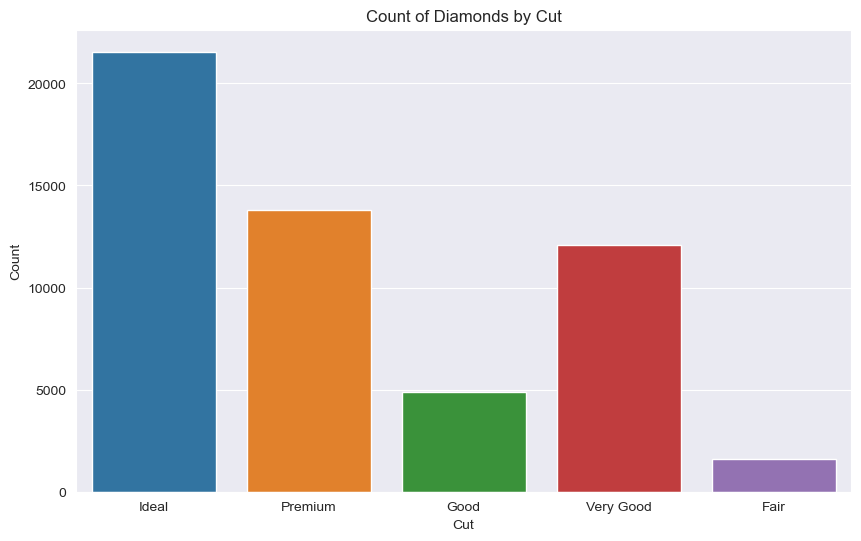

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
diamonds = pd.read_csv('data/diamonds.csv')

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(data=diamonds, x='cut')
plt.title('Count of Diamonds by Cut')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()